In [8]:
rand = '/content/drive/MyDrive/GitHub/COS598D-Pruning/Results/data/singleshot/rand_0_5/compression.pkl'
mag = '/content/drive/MyDrive/GitHub/COS598D-Pruning/Results/data/singleshot/mag_0_5/compression.pkl'
snip = '/content/drive/MyDrive/GitHub/COS598D-Pruning/Results/data/singleshot/snip_0_5/compression.pkl'
grasp = '/content/drive/MyDrive/GitHub/COS598D-Pruning/Results/data/singleshot/grasp_0_5/compression.pkl'
synflow = '/content/drive/MyDrive/GitHub/COS598D-Pruning/Results/data/singleshot/synflow_0_5/compression.pkl'

r = pd.read_pickle(rand)
m = pd.read_pickle(mag)
sn = pd.read_pickle(snip)
g = pd.read_pickle(grasp)
sy = pd.read_pickle(synflow)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import matplotlib as mpl
from matplotlib import rc

In [5]:
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

In [7]:
comp.head(50)

,module,param,sparsity,size,shape,flops,score mean,score variance,score sum,score abs mean,score abs variance,score abs sum,prunable
0,layers.0.conv,weight,0.560185,1728,"(64, 3, 3, 3)",1769472,4.450945e-05,8.900291e-08,0.076912,1.538199e-04,6.732343e-08,0.265801,True
1,layers.0.conv,bias,1.000000,64,"(64,)",65536,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,False
2,layers.1.conv,weight,0.483181,36864,"(64, 64, 3, 3)",37748736,2.075134e-06,4.294618e-09,0.076498,2.520945e-05,3.663408e-09,0.929321,True
3,layers.1.conv,bias,1.000000,64,"(64,)",65536,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,False
4,layers.3.conv,weight,0.455471,73728,"(128, 64, 3, 3)",18874368,1.038030e-06,1.728651e-09,0.076532,1.590854e-05,1.476646e-09,1.172905,True
5,layers.3.conv,bias,1.000000,128,"(128,)",32768,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,False
6,layers.4.conv,weight,0.407010,147456,"(128, 128, 3, 3)",37748736,5.169493e-07,5.200354e-10,0.076227,7.789511e-06,4.596262e-10,1.148610,True
7,layers.4.conv,bias,1.000000,128,"(128,)",32768,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,False
8,layers.6.conv,weight,0.384271,294912,"(256, 128, 3, 3)",18874368,2.561208e-07,2.032912e-10,0.075533,4.886558e-06,1.794783e-10,1.441105,True
9,layers.6.conv,bias,1.000000,256,"(256,)",16384,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,False


In [17]:
df = pd.DataFrame()
df["rand"] = r['sparsity']
df["mag"] = m['sparsity']
df["snip"] = sn['sparsity']
df["grasp"] = g['sparsity']
df["synflow"] = sy['sparsity']

# r = pd.read_pickle(rand)
# m = pd.read_pickle(mag)
# sn = pd.read_pickle(snip)
# g = pd.read_pickle(grasp)
# sy = pd.read_pickle(synflow)

In [18]:
df.head(50)

,rand,mag,snip,grasp,synflow
0,0.306713,0.919560,0.961227,0.560185,0.997685
1,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.314372,0.683404,0.810954,0.483181,0.983805
3,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.317084,0.684923,0.696438,0.455471,0.969618
5,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.315186,0.594231,0.557475,0.407010,0.940477
7,1.000000,1.000000,1.000000,1.000000,1.000000
8,0.317088,0.590013,0.497128,0.384271,0.881911
9,1.000000,1.000000,1.000000,1.000000,1.000000


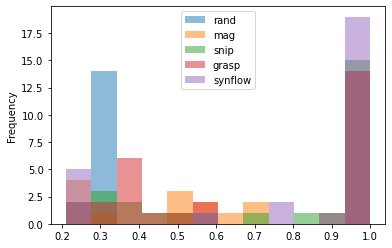

In [19]:
ax = df.plot.hist(bins=12, alpha=0.5)